# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

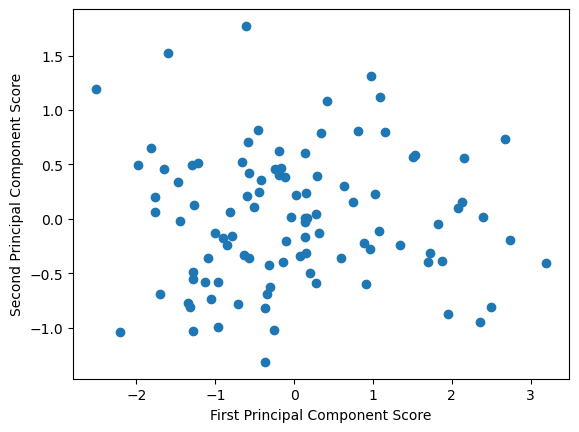

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

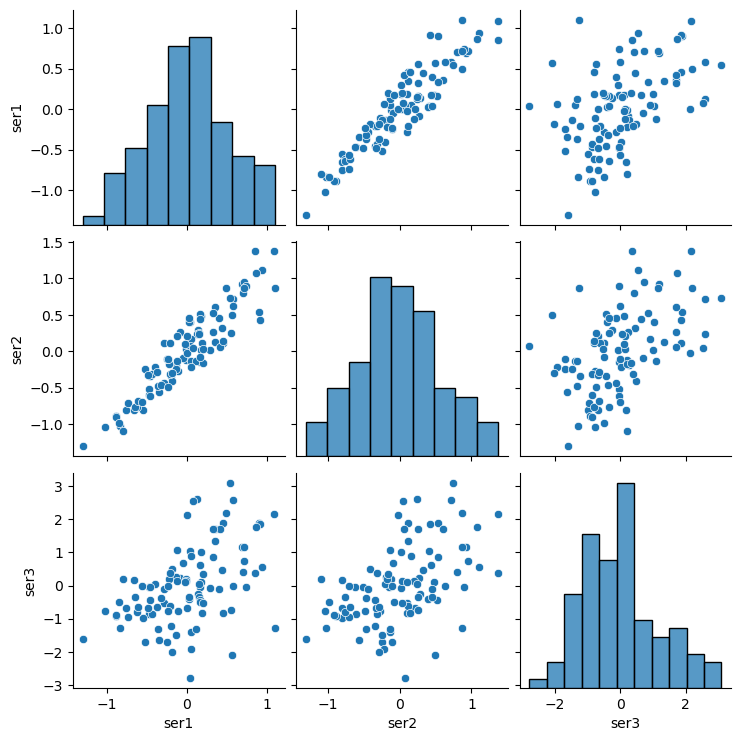

In [4]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#Response: The first principal component score of the three outliers is very low overall (between 0 and -2) while the second principal component score of these outliers is high overall (between 1 and 1.7). 
#Their values in all three series are well outside the norm but it is difficult to say with certainty since series 1 and series 2 are very related to each other as shown in the above pairplot.
#Series 1 and 2 are linearly related due to how the latter derives very directly from the former with little noise compared to series 3, making it difficult to distinguish between the two. 
#The PCA graph shown above is useful in visualizing all three series at once in a multi-dimensional plane but a disadvantage is that it can be hard to interpret at first glance based on its scale. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

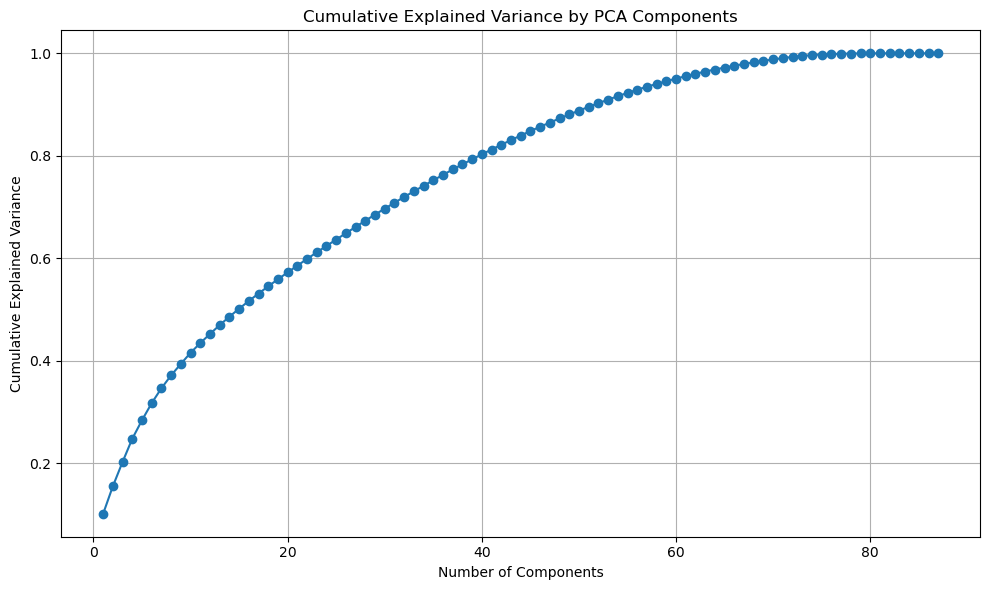

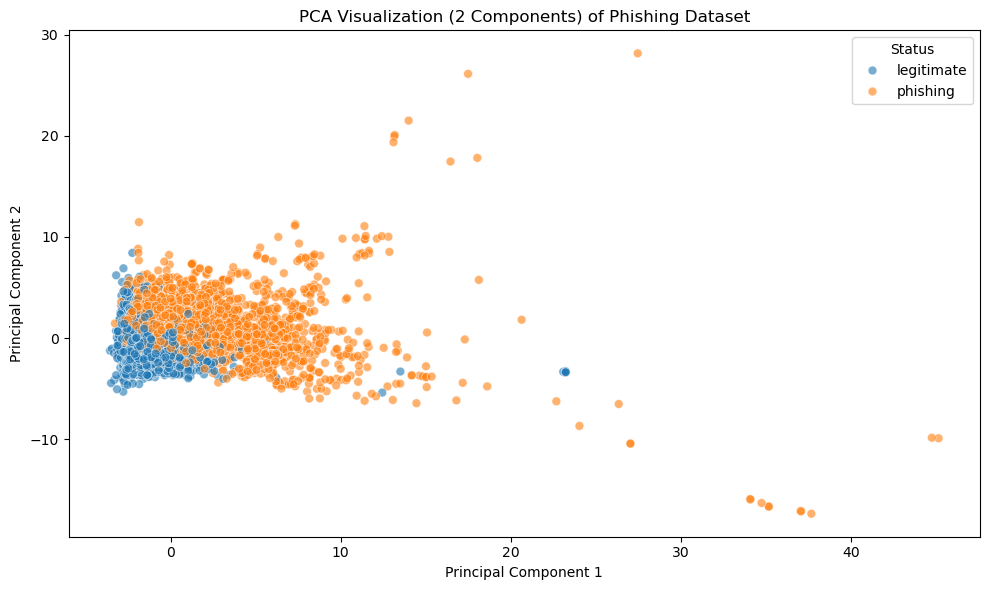

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the phishing website dataset
df = pd.read_csv("C://Users//alfre_g2qn6y7//OneDrive//Documents//dataset_phishing.csv")

# Drop non-numeric columns
features = df.drop(columns=["url", "status"])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Do PCA to explore variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)



# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Reduce to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['status'] = df['status']

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='status', alpha=0.6, s=40)
plt.title('PCA Visualization (2 Components) of Phishing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [ ]:
#Based on the graphs above, it is clear that it takes at least 40 principal components to explain approximately 80% of the explained variance. In other words, a few components can't capture the bulk of the data.
#It is also clear that there is significant separation between phishing and legitimate websites and webpages based on the 2D pca plot along with some overlap. Nearly all of the outliers on this graph are phishing websites and webpages. 

<Axes: xlabel='PC1', ylabel='PC2'>

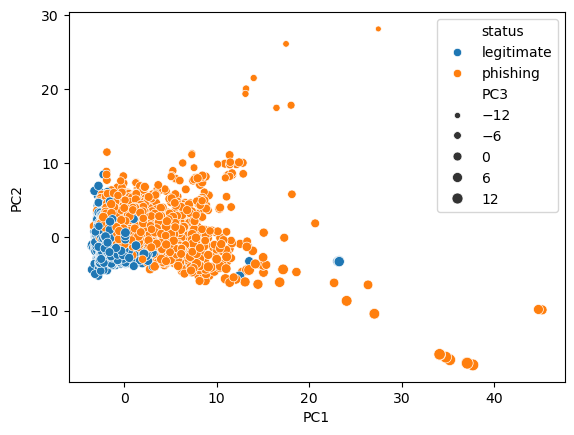

In [7]:
# Reduce to 3 principal components for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2','PC3'])
df_pca_3d['status'] = df['status']

sns.scatterplot(data=df_pca_3d,x='PC1',y='PC2',size='PC3',hue='status')

In [ ]:
#While this is a bubble plot, it shows signficant separation between phishing and legitimate websites just like the 2D pca plot. It also shows that the vast majority of outliers are phishing websites or webpages. 

In [7]:
#Load Phishing Email dataset and extract new features aside from Email Text and Email Type. 
import pandas as pd
import re
import string
df = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
df = df.dropna()


def extract_basic_features(text):
    num_chars = len(text)
    words = text.split()
    num_words = len(words)
    avg_word_len = sum(len(word) for word in words) / num_words if num_words > 0 else 0
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    num_capitals = sum(1 for c in text if c.isupper())
    num_exclamations = text.count('!')
    num_question_marks = text.count('?')
    num_special_chars = sum(1 for c in text if c in string.punctuation and c not in ['!', '?'])
    num_digits = sum(1 for c in text if c.isdigit())
    num_urls = len(re.findall(r'http[s]?://\S+', text))

    return pd.Series([
        num_chars, num_words, avg_word_len, num_sentences,
        num_capitals, num_exclamations, num_question_marks,
        num_special_chars, num_digits, num_urls
    ])

# Apply to the DataFrame
df_basic = df['Email Text'].apply(extract_basic_features)
df_basic.columns = [
    'num_chars', 'num_words', 'avg_word_len', 'num_sentences',
    'num_capitals', 'num_exclamations', 'num_question_marks',
    'num_special_chars', 'num_digits', 'num_urls'
]

# Combine with original dataframe
df_combined = pd.concat([df, df_basic], axis=1)

#Drop extreme values (major outliers (top 1%) were identified in previous milestone )
cols = ['num_chars', 'num_words', 'avg_word_len', 'num_sentences',
    'num_capitals', 'num_exclamations', 'num_question_marks',
    'num_special_chars', 'num_digits', 'num_urls']

# Compute the 99th percentile threshold for each of these columns
threshold = df_combined[cols].quantile(0.99)

# Filter out rows where any column exceeds its respective threshold
df_filtered = df_combined[(df_combined[cols] <= threshold).all(axis=1)]

#Create correlation matrix
df_filtered[cols].corr()


,num_chars,num_words,avg_word_len,num_sentences,num_capitals,num_exclamations,num_question_marks,num_special_chars,num_digits,num_urls
num_chars,1.000000,0.980082,-0.044301,0.821984,0.214604,0.153432,0.258481,0.741261,0.566262,-0.000261
num_words,0.980082,1.000000,-0.157663,0.816708,0.107489,0.155044,0.255156,0.763236,0.599468,-0.082903
avg_word_len,-0.044301,-0.157663,1.000000,-0.020147,0.317003,0.003569,0.007217,0.037722,-0.127339,0.602107
num_sentences,0.821984,0.816708,-0.020147,1.000000,0.281561,0.288808,0.335982,0.735440,0.576113,0.129068
num_capitals,0.214604,0.107489,0.317003,0.281561,1.000000,0.269574,0.176039,0.259199,0.111057,0.379785
num_exclamations,0.153432,0.155044,0.003569,0.288808,0.269574,1.000000,0.126800,0.162377,0.091505,0.060385
num_question_marks,0.258481,0.255156,0.007217,0.335982,0.176039,0.126800,1.000000,0.266720,0.114385,0.144720
num_special_chars,0.741261,0.763236,0.037722,0.735440,0.259199,0.162377,0.266720,1.000000,0.580114,0.251688
num_digits,0.566262,0.599468,-0.127339,0.576113,0.111057,0.091505,0.114385,0.580114,1.000000,-0.017486
num_urls,-0.000261,-0.082903,0.602107,0.129068,0.379785,0.060385,0.144720,0.251688,-0.017486,1.000000


<Axes: xlabel='num_chars', ylabel='num_words'>

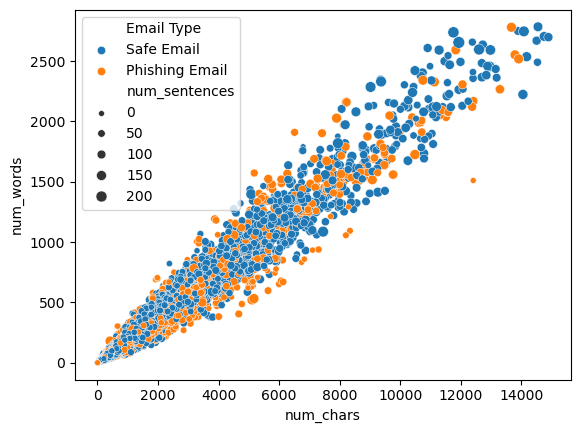

In [8]:
#Create bubble plot of most correlated variables
import seaborn as sns
sns.scatterplot(data=df_filtered,x="num_chars",y="num_words",size="num_sentences",hue="Email Type")

<Axes: xlabel='num_sentences', ylabel='num_words'>

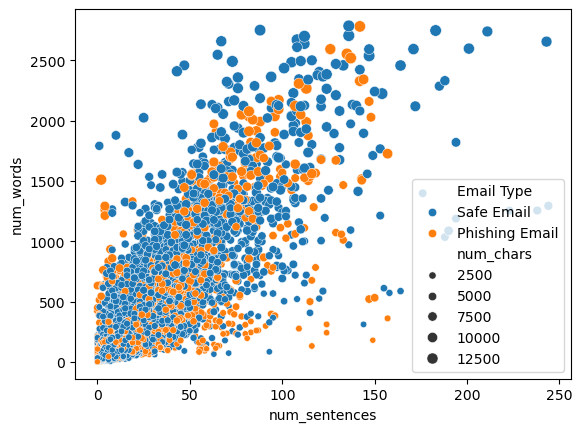

In [9]:
sns.scatterplot(data=df_filtered,x="num_sentences",y="num_words",size="num_chars",hue="Email Type")

In [ ]:
#Based on these bubble plots, it is clear that there is a strong linear relationship between num_words and num_characters (as expected) and a weaker linear relationship between num sentences and num words. 
#It is also clear that there isn't much separation between phishing and safe emails since they are scattered throughout the graph. 

Text(0.5, 1.0, 'Average CVSS Score by Complexity and Vector')

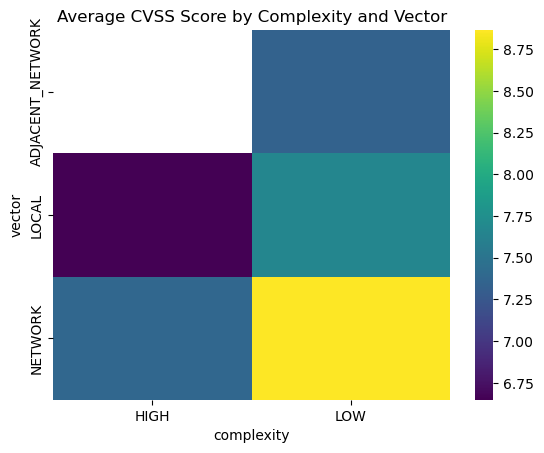

In [2]:
import pandas as pd
import seaborn as sns
CISA = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\CISA.csv")
pivot = CISA.pivot_table(index = ["vector"], columns = ["complexity"], values = "cvss", aggfunc = "mean") # note mean, not sum this time
sns.heatmap(pivot, cmap = "viridis") 
import matplotlib.pyplot as plt 
plt.title("Average CVSS Score by Complexity and Vector")


In [3]:
phishing_keywords = ["phishing", "social engineering", "spoofing", "deception", "redirect", "cleartext"]
phishing_df = CISA[CISA.apply(lambda row: any(str(row[col]).lower().find(keyword) != -1 
                                          for keyword in phishing_keywords 
                                          for col in ["vulnerability_name", "short_description", "notes"]), axis=1)]


Text(0.5, 1.0, 'Average CVSS Score by Complexity and Vector (Phishing-Specific)')

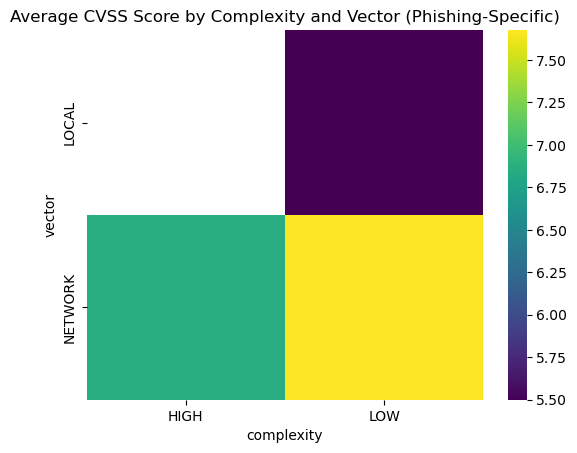

In [5]:
pivot = phishing_df.pivot_table(index = ["vector"], columns = ["complexity"], values = "cvss", aggfunc = "mean") # note mean, not sum this time
sns.heatmap(pivot, cmap = "viridis") 
import matplotlib.pyplot as plt 
plt.title("Average CVSS Score by Complexity and Vector (Phishing-Specific)")

In [ ]:
#Just as observed in the Milestone Three bivariate analysis, phishing vulnerabilities are on average less severe than the norm (cvss represents severity)
#However, it is noteworthy that for both phishing and general vulnerabilities, the average cvss score is the highest for low complexity network vector vulnerabilities and lowest for local vector high complexity vulnerabilities. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

Text(0.5, 1.0, 'Marriage Rate By Education Level')

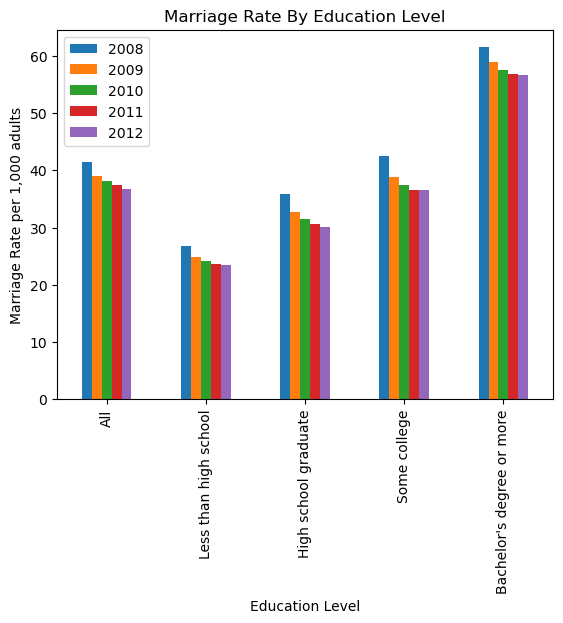

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    "Education Level": [
        "All", 
        "Less than high school", 
        "High school graduate", 
        "Some college", 
        "Bachelor's degree or more"
    ],
    "2008": [41.4, 26.8, 35.9, 42.5, 61.5],
    "2009": [39.0, 24.8, 32.7, 38.8, 58.9],
    "2010": [38.2, 24.1, 31.5, 37.4, 57.6],
    "2011": [37.4, 23.6, 30.6, 36.6, 56.8],
    "2012": [36.7, 23.4, 30.1, 36.5, 56.7]
}


# Create the DataFrame
df = pd.DataFrame(data)

df.set_index("Education Level",inplace=True)
df.plot(kind="bar",stacked=False)
plt.xlabel("Education Level")
plt.ylabel("Marriage Rate per 1,000 adults")
plt.title("Marriage Rate By Education Level")

#Based on page 130 graph
